In [ ]:
from efficiency import *
from data_exploration.visualize import *
from dirs import OUTPUT_DIR, PLOT_PATH

In [ ]:
dir_unreduced_unfit = '/data/atlas/users/lschoonh/BachelorProject/output/outrunner_model/'
dir_unreduced_fit = '/data/atlas/users/lschoonh/BachelorProject/output/unreduced_fit/'
dir_reduced_unfit = '/data/atlas/users/lschoonh/BachelorProject/output/reduced/random/unfit/'
dir_reduced_fit = '/data/atlas/users/lschoonh/BachelorProject/output/reduced/random/fit/'

output_dir = PLOT_PATH

dirs = [dir_unreduced_unfit, dir_unreduced_fit, dir_reduced_unfit, dir_reduced_fit]
tags = ['HL DNN', 'HL DNN + fit', 'Red. DNN', 'Red. DNN + fit']

In [ ]:
logger = get_logger(tag="notebook_plots")

In [ ]:
dir = dirs[0]
all_considered_particles_extended, all_considered_pairs_extended, n_events = extract(
        dir=dir, event_name=None
    )

In [ ]:
tags[:2]

In [ ]:
comparison_datasets = [extract(
        dir=dir, event_name=None
    ) for dir in dirs]

In [40]:
all_considered_particles_extended_arr, all_considered_pairs_extended_arr, n_events_arr = [], [], []
for data in comparison_datasets:
    all_considered_particles_extended, all_considered_pairs_extended, n_events = data
    all_considered_particles_extended_arr.append(all_considered_particles_extended)
    all_considered_pairs_extended_arr.append(all_considered_pairs_extended)
    n_events_arr.append(n_events)
n_events_arr

[22, 19, 364, 378]

In [ ]:
if False:
    evaluate_submission(
        all_considered_particles_extended_arr,
        all_considered_pairs_extended_arr,
        n_events_arr,
        tags_arr=tags[:2],
        dir=output_dir,
        bins=100,
    )

In [41]:
output_dir = ''
particles = all_considered_particles_extended
pairs = all_considered_pairs_extended
tag=f"{n_events}_events",
thr=0.5
bins = 100

Setup margins

In [ ]:
# prepare_path(dir)

tag_str = f"_{tag}" if tag else ""

# Define types of matches
good = pairs[(pairs["particle_purity"] >= thr) & (pairs["track_purity"] >= thr)]
split = pairs[(pairs["particle_purity"] < thr) & (pairs["track_purity"] >= thr)]
multiple = pairs[(pairs["particle_purity"] >= thr) & (pairs["track_purity"] < thr)]
bad = pairs[(pairs["particle_purity"] < thr) & (pairs["track_purity"] < thr)]

match_types: list[pd.DataFrame] = [good, split, multiple, bad]
match_types_str: list[str] = ["good", "split", "multiple", "bad"]

variables_str = ["r_0", "z_0", "p_0", "p_t_0", "log_10_p_t_0", "phi_0", "theta_0", "pseudo_rapidity_0"]
var_labels = [
    "vertex $r_0$ [mm]",
    "vertex $z_0$ [mm]",
    "$p$",
    "$P_{T}$",
    "$log_{10}$ $p_{T}$",
    "$\\phi$",
    "$\\theta$",
    "$\\eta$",
]

x_mins = [0, -15, 0, 0, None, -np.pi, 0, -np.pi]
x_maxs = [600, 15, 25, 5, 2, np.pi, np.pi, np.pi]

# For efficiencies only
y_mins = [None, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
y_maxs = [1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
if False:
    matches = match_types[0]
    nmatch_type_str = match_types_str[0]
    variable = variables_str[2]
    label = var_labels[2]
    x_min = x_mins[2]
    x_max = x_maxs[2]

    fig = plot_efficiency(
        particles,
        matches,
        variable=variable,
        bins=bins,
        x_min=x_min,
        x_max=x_max,
        xlabel=label,
    )

In [ ]:
if False:    
    matches = match_types[0]
    nmatch_type_str = match_types_str[0]
    variable = variables_str[2]
    label = var_labels[2]
    x_min = x_mins[2]
    x_max = x_maxs[2]

    fig2 = plot_efficiency(
        particles,
        matches,
        variable=variable,
        bins=bins,
        x_min=x_min,
        x_max=x_max,
        xlabel=label,
        base=fig
    )

    fig2

In [42]:
fig = None
output_dir = ''
thr=0.5
bins = 100

match_types_str: list[str] = ["good", "split", "multiple", "bad"]

variables_str = ["r_0", "z_0", "p_0", "p_t_0", "log_10_p_t_0", "phi_0", "theta_0", "pseudo_rapidity_0"]
var_labels = [
    "vertex $r_0$ [mm]",
    "vertex $z_0$ [mm]",
    "$p$",
    "$P_{T}$",
    "$log_{10}$ $p_{T}$",
    "$\\phi$",
    "$\\theta$",
    "$\\eta$",
]

x_mins = [0, -15, 0, 0, None, -np.pi, 0, -np.pi]
x_maxs = [600, 15, 25, 5, 2, np.pi, np.pi, np.pi]

# For efficiencies only
y_mins = [0, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
y_maxs = [1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
output_figs = []

for i, match_type_str in enumerate(match_types_str):
    for variable, label, x_min, x_max in zip(variables_str, var_labels, x_mins, x_maxs):
        fig = None
        for data, comparison_tag in zip(comparison_datasets, tags):
            all_considered_particles_extended, all_considered_pairs_extended, n_events = data
            
            particles = all_considered_particles_extended
            pairs = all_considered_pairs_extended
            tag=f"{n_events}_events",
            
            # prepare_path(dir)

            tag_str = f"_{tag}" if tag else ""
            datalabel = f"{match_type_str} efficiency ({comparison_tag})"

            # Define types of matches
            good = pairs[(pairs["particle_purity"] >= thr) & (pairs["track_purity"] >= thr)]
            split = pairs[(pairs["particle_purity"] < thr) & (pairs["track_purity"] >= thr)]
            multiple = pairs[(pairs["particle_purity"] >= thr) & (pairs["track_purity"] < thr)]
            bad = pairs[(pairs["particle_purity"] < thr) & (pairs["track_purity"] < thr)]

            match_types: list[pd.DataFrame] = [good, split, multiple, bad]
            matches = match_types[i]

            fig = plot_efficiency(
                particles,
                matches,
                variable=variable,
                bins=bins,
                x_min=x_min,
                x_max=x_max,
                xlabel=label,
                datalabel=datalabel,
                base=fig
            )
        output_figs.append(fig)

In [ ]:
len(output_figs)

In [ ]:
fig = None
for data, comparison_tag in zip(comparison_datasets, tags):
    all_considered_particles_extended, all_considered_pairs_extended, n_events = data
    
    particles = all_considered_particles_extended
    pairs = all_considered_pairs_extended
    tag=f"{n_events}_events",
    
    # prepare_path(dir)

    tag_str = f"_{tag}" if tag else ""


    # Define types of matches
    good = pairs[(pairs["particle_purity"] >= thr) & (pairs["track_purity"] >= thr)]
    split = pairs[(pairs["particle_purity"] < thr) & (pairs["track_purity"] >= thr)]
    multiple = pairs[(pairs["particle_purity"] >= thr) & (pairs["track_purity"] < thr)]
    bad = pairs[(pairs["particle_purity"] < thr) & (pairs["track_purity"] < thr)]

    match_types: list[pd.DataFrame] = [good, split, multiple, bad]
    
    matches = match_types[0]
    match_type_str = match_types_str[0]
    variable = variables_str[2]
    label = var_labels[2]
    x_min = x_mins[2]
    x_max = x_maxs[2]
    datalabel = f"{match_type_str} efficiency $\Delta$ ({comparison_tag})"


    fig = plot_efficiency(
        particles,
        matches,
        variable=variable,
        bins=bins,
        x_min=x_min,
        x_max=x_max,
        xlabel=label,
        datalabel=datalabel,
        base=fig
    )

In [43]:
good_arr = []
split_arr = []
multiple_arr = []
bad_arr = []
for particles, pairs in zip(all_considered_particles_extended_arr, all_considered_pairs_extended_arr):
    good_arr.append(pairs[(pairs["particle_purity"] >= thr) & (pairs["track_purity"] >= thr)])
    split_arr.append(pairs[(pairs["particle_purity"] < thr) & (pairs["track_purity"] >= thr)])
    multiple_arr.append(pairs[(pairs["particle_purity"] >= thr) & (pairs["track_purity"] < thr)])
    bad_arr.append(pairs[(pairs["particle_purity"] < thr) & (pairs["track_purity"] < thr)])

match_types_arrs: list[list[pd.DataFrame]] = [good_arr, split_arr, multiple_arr, bad_arr]

In [ ]:
len(good_arr)

In [ ]:
from collections import OrderedDict


def fraction_histogram(
    data: list[DataFrame],
    variable: str,
    bins=100,
    min: float | None = None,  # type: ignore
    max: float | None = None,  # type: ignore
    density=False,
    labels: list[str] | None = None,
    title="",
    xlabel="x",
    ylabel="y",
    figsize=(10, 6),
    type="fill",
    bar_pos=None,
    colors = None,
    base: Figure | None = None,
    **kwargs,
):
    # Find labels
    if labels is not None:
        assert len(labels) == len(data), "Number of labels must match number of dataframes"
    else:
        labels = [f"df_{i}" for i in np.arange(len(data))]
        
    if bar_pos is not None:
        assert len(bar_pos) == len(data), "Number of bar positions must match number of dataframes"

    # Find range
    range = get_range(data, variable, min, max)
    (min, max) = range

    # Make histograms
    hists = [np.histogram(df[variable], bins=bins, range=range, density=density) for df in data]
    tots = sum([hist[0] for hist in hists])

    # Plot
    fig, ax = plt.subplots(figsize=figsize) if base is None else (base, base.gca())

    x = np.arange(min, max, (max - min) / bins)
    fractions = np.nan_to_num([hist[0] / tots for hist in hists])
    cumsum = np.cumsum(fractions, axis=0)

    for i, (cum, label) in enumerate(zip(cumsum, labels)):
        if colors is not None:
            kwargs["color"] = colors[i]
        
        floor: float | np.ndarray = cumsum[i - 1] if i > 0 else np.zeros(len(cum))
        ceiling = cum
        bpos = bar_pos[i] if bar_pos is not None else x
        # ax.plot(x, cum, **kwargs)
        if type == "fill":
            ax.fill_between(x, floor, ceiling, label=label, **kwargs)  # type: ignore
        elif type == "bar":
            ax.bar(bpos, cum, label=label, zorder=-i, **kwargs)
        elif type == "barh":
            ax.barh(bpos, cum, label=label, zorder=-i, **kwargs)

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(f"Efficiency by {xlabel}" if title is None else title)
    
    
    # handles, _labels = plt.gca().get_legend_handles_labels()
    # by_label = OrderedDict(zip(_labels, handles))
    # plt.legend(by_label.values(), by_label.keys())
    ax.legend()

    ax.autoscale(enable=True, axis="both", tight=True)
    fig.tight_layout()
    return fig

In [46]:
for i, tag in enumerate(comparison_datasets):
    match_types = [arr[i] for arr in match_types_arrs]
    [df.insert(0, "track_count", 1) for df in match_types]

In [ ]:
kwargs = {
    "height": 1,
}

/tmp/ipykernel_13178/531036425.py:43: RuntimeWarning: invalid value encountered in divide
  fractions = np.nan_to_num([hist[0] / tots for hist in hists])


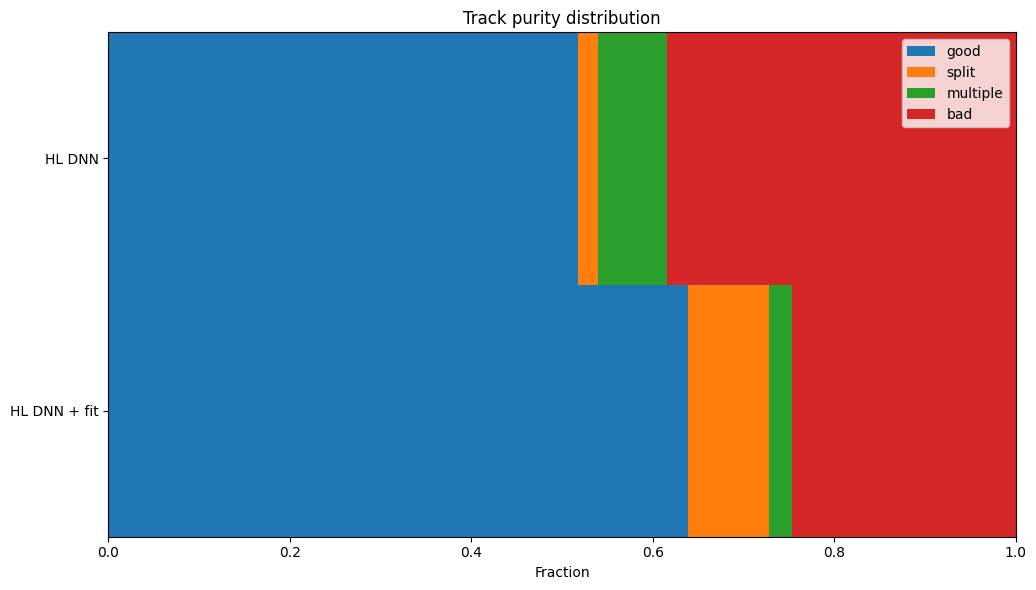

In [66]:
fig = None
yticks = []
ylabels = []
for i, tag in enumerate(tags[:2]):
    match_types = [arr[i] for arr in match_types_arrs]
    fig = fraction_histogram(
        match_types,
        variable="track_count",
        labels=match_types_str,
        bins=2,
        min=0,
        max=1,
        title="Track purity distribution",
        xlabel="Fraction",
        ylabel="",
        type="barh",
        bar_pos=len(match_types)*[i],
        base=fig,
        colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],
        **kwargs
    )
    yticks.append(i)
    ylabels.append(tag)
fig.gca().invert_yaxis()
fig.gca().set_yticks(yticks, ylabels)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

In [ ]:
# Find labels
if labels is not None:
    assert len(labels) == len(data), "Number of labels must match number of dataframes"
else:
    labels = [f"df_{i}" for i in np.arange(len(data))]

# Find range
range = get_range(data, variable, min, max)
(min, max) = range

# Make histograms
hists = [np.histogram(df[variable], bins=bins, range=range, density=density) for df in data]
tots = sum([hist[0] for hist in hists])

# Plot
x = np.arange(min, max, (max - min) / bins)
fractions = np.nan_to_num([hist[0] / tots for hist in hists])
cumsum = np.cumsum(fractions, axis=0)
for i, (cum, label) in enumerate(zip(cumsum, labels)):
    floor: float | np.ndarray = cumsum[i - 1] if i > 0 else np.zeros(len(cum))
    ceiling = cum
    # ax.plot(x, cum, **kwargs)
    if type == "fill":
        ax.fill_between(x, floor, ceiling, label=label, **kwargs)  # type: ignore
    if type == "bar":
        ax.bar(x, cum, label=label, zorder=-i, **kwargs)
    if type == "barh":
        ax.barh(barh_pos, cum, label=label, zorder=-i, **kwargs)

ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.set_title(f"Efficiency by {xlabel}" if title is None else title)
ax.legend()

ax.legend()

fig.tight_layout()

In [ ]:
ylabels

In [68]:
def horizontal_fractions(
    data_arr: list[list[DataFrame]],
    variable: str,
    datalabels: list[str],
    min: float | None = None,  # type: ignore
    max: float | None = None,  # type: ignore
    labels: list[str] | None = None,
    title="",
    xlabel="x",
    ylabel="y",
    colors=None,
    **kwargs,
):
    fig = None
    yticks = []
    ylabels = []
    
    for matches_arr in data_arr:
        if datalabels is None:
            datalabels = [""] * len(data)
        else:
            print(datalabels, len(matches_arr))
            assert len(datalabels) == len(matches_arr), "Number of data labels must match number of dataframes"

    for i, tag in enumerate(datalabels):
    # for i, data in enumerate(zip(data_arr, datalabels)):
        match_types = [arr[i] for arr in data_arr]
        fig = fraction_histogram(
            match_types,
            variable=variable,
            labels=labels,
            bins=1,
            min=min,
            max=max,
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
            type="barh",
            bar_pos=len(match_types) * [i],
            base=fig,
            colors=colors,
            **kwargs,
        )
        yticks.append(i)
        ylabels.append(tag)
    fig.gca().set_yticks(yticks, ylabels)
    fig.gca().invert_yaxis()
    
    # Reset legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    fig.gca().legend(by_label.values(), by_label.keys())
    return fig


In [64]:
len(match_types_arrs),len(match_types_arrs[3]), len(match_types_str), len(tags)

(4, 4, 4, 4)

['HL DNN', 'HL DNN + fit', 'Red. DNN', 'Red. DNN + fit'] 4
['HL DNN', 'HL DNN + fit', 'Red. DNN', 'Red. DNN + fit'] 4
['HL DNN', 'HL DNN + fit', 'Red. DNN', 'Red. DNN + fit'] 4
['HL DNN', 'HL DNN + fit', 'Red. DNN', 'Red. DNN + fit'] 4


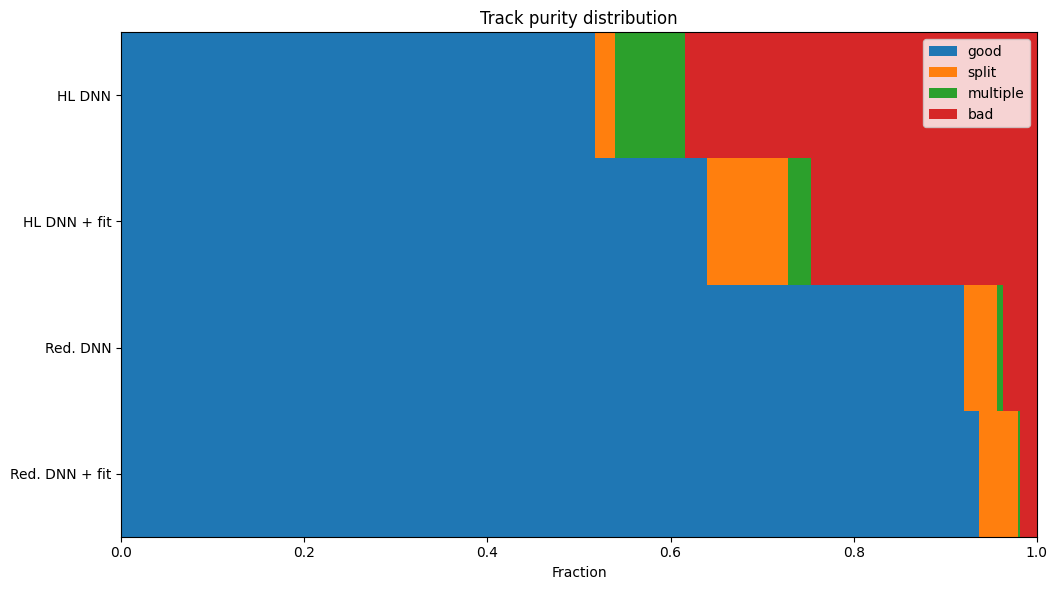

In [70]:
fig = horizontal_fractions(
    match_types_arrs,
    datalabels=tags,
    variable="track_count",
    labels=match_types_str,
    min=0,
    max=1,
    title="Track purity distribution",
    xlabel="Fraction",
    ylabel="",
    colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],
    **kwargs
)